The attributes are 

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash  
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline            

Number of Instances

* class 1 59

* class 2 71

* class 3 48


Number of Attributes 
	
* 13

PCA involves following broad level steps –

## Standardize the d-dimensional dataset.
## Construct the covariance matrix.
## Decompose the covariance matrix into its eigenvectors and eigenvalues.
## Select k eigenvectors that correspond to the k largest eigenvalues, where k is 
## the dimensionality of the new feature subspace ( k≤d ).
## Construct a projection matrix W from the "top" k eigenvectors.
## Transform the d-dimensional input dataset x using the projection matrix W to
## obtain the new k-dimensional feature subspace 

### Read in the data and perform basic exploratory analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

# Add columns,Descriptive analytics
print("Shape of the dataset: ", dataset.shape)
dataset.columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_ash',
                  'magnesium', 'total_phenol', 'flavanoids', 'nonflavanoid_phenols',
                  'proanthocyanins', 'color_intensity', 'hue', 'diluted_wines',
                  'proline']


# Check the imported dataset
dataset.tail(5)

Shape of the dataset:  (178, 14)


,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [2]:
dataset.iloc[:,1:].describe()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
dataset.dtypes

class                     int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_ash          float64
magnesium                 int64
total_phenol            float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
diluted_wines           float64
proline                   int64
dtype: object

In [4]:
dataset.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_ash          0
magnesium               0
total_phenol            0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
diluted_wines           0
proline                 0
dtype: int64

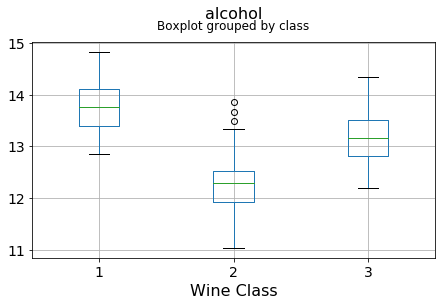

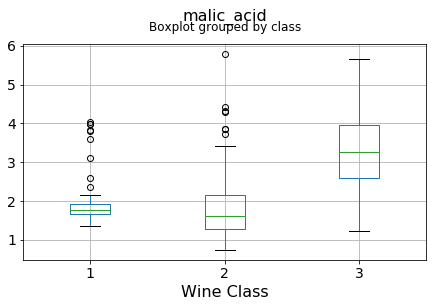

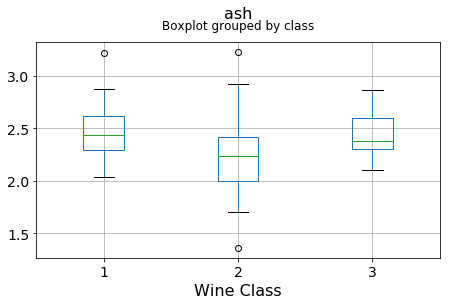

In [5]:
for c in dataset.columns[1:4]:
    dataset.boxplot(c,by='class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

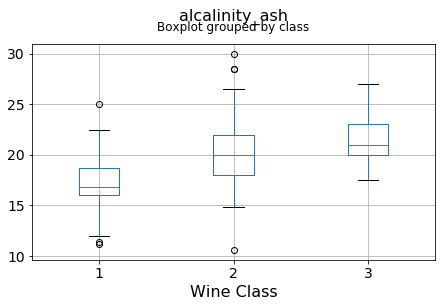

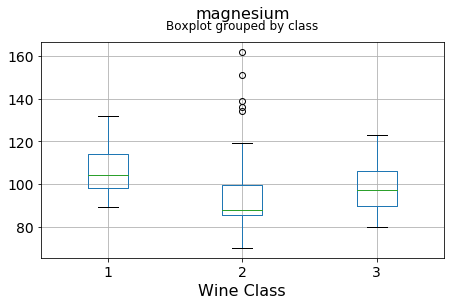

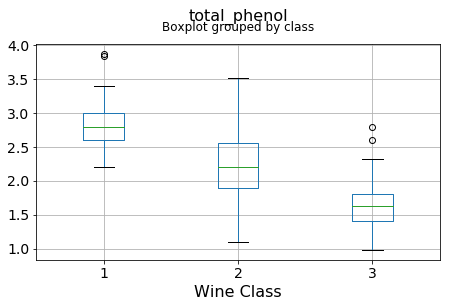

In [6]:
for c in dataset.columns[4:7]:
    dataset.boxplot(c,by='class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

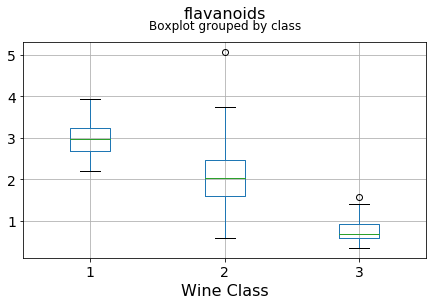

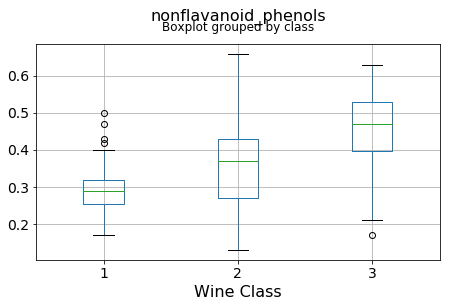

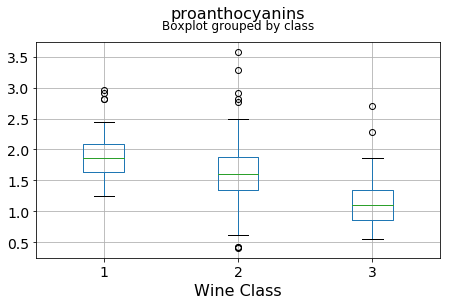

In [7]:
for c in dataset.columns[7:10]:
    dataset.boxplot(c,by='class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

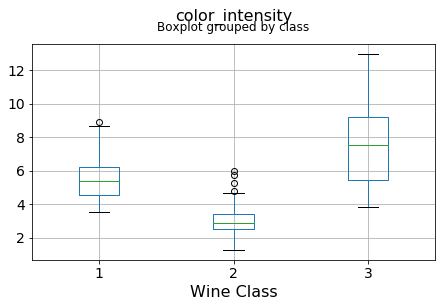

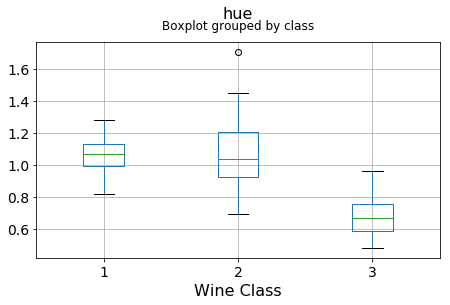

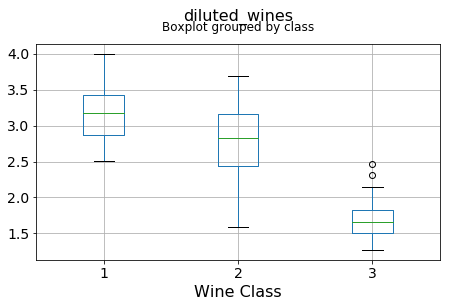

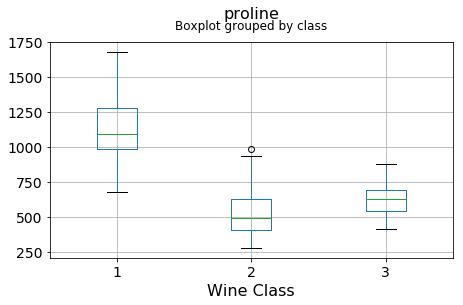

In [8]:
for c in dataset.columns[10:]:
    dataset.boxplot(c,by='class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

### It can be seen that some features classify the wine labels pretty clearly. For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

### Below is an example of class seperation using two variables

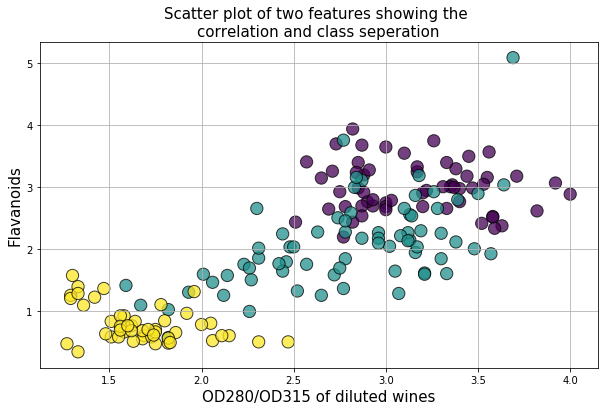

In [9]:
df = dataset.copy()
plt.figure(figsize=(10,6))
plt.scatter(df['diluted_wines'],df['flavanoids'],c=df['class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

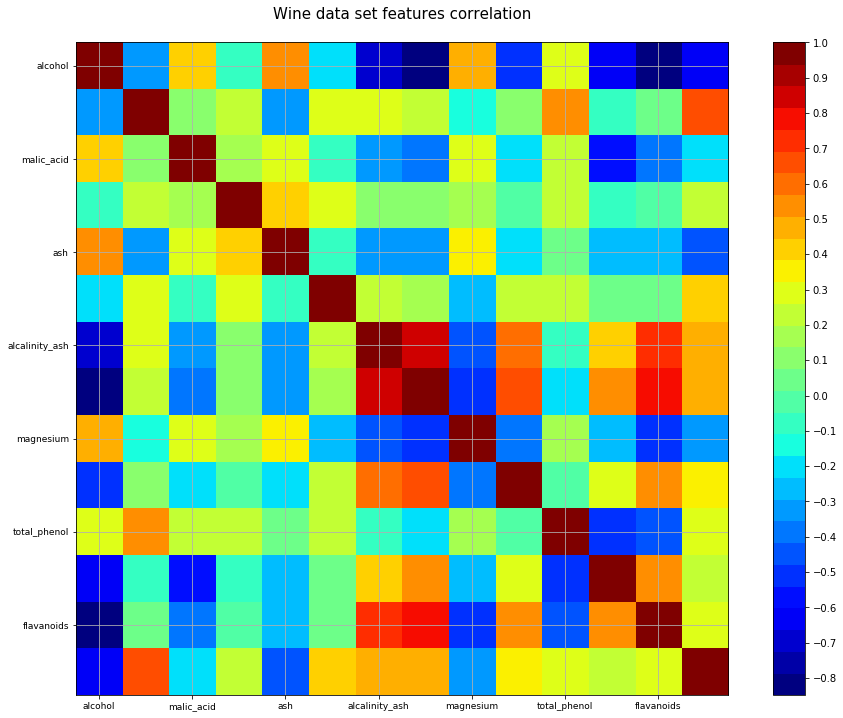

In [10]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [11]:
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
class,1,-0.33,0.44,-0.05,0.52,-0.21,-0.72,-0.85,0.49,-0.5,0.27,-0.62,-0.79,-0.63
alcohol,-0.33,1,0.094,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.072,0.072,0.64
malic_acid,0.44,0.094,1,0.16,0.29,-0.055,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
ash,-0.05,0.21,0.16,1,0.44,0.29,0.13,0.12,0.19,0.0097,0.26,-0.075,0.0039,0.22
alcalinity_ash,0.52,-0.31,0.29,0.44,1,-0.083,-0.32,-0.35,0.36,-0.2,0.019,-0.27,-0.28,-0.44
magnesium,-0.21,0.27,-0.055,0.29,-0.083,1,0.21,0.2,-0.26,0.24,0.2,0.055,0.066,0.39
total_phenol,-0.72,0.29,-0.34,0.13,-0.32,0.21,1,0.86,-0.45,0.61,-0.055,0.43,0.7,0.5
flavanoids,-0.85,0.24,-0.41,0.12,-0.35,0.2,0.86,1,-0.54,0.65,-0.17,0.54,0.79,0.49
nonflavanoid_phenols,0.49,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1,-0.37,0.14,-0.26,-0.5,-0.31
proanthocyanins,-0.5,0.14,-0.22,0.0097,-0.2,0.24,0.61,0.65,-0.37,1,-0.025,0.3,0.52,0.33


### It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other,


### Principal Component Analysis
### Data scaling
### PCA requires scaling/normalization of the data to work properly

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X = df.drop('class',axis=1)
y = df['class']

In [15]:
X = scaler.fit_transform(X)


In [16]:

dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [17]:
dfx.head(10)

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [18]:
dfx.describe()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenol,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [19]:
cov_matrix = np.cov(dfx.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 

In [20]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.

In [21]:
eigen_vals, eigen_vecs = np.linalg.eigh(cov_matrix)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[ 0.10396199  0.16972374  0.22706428  0.25232001  0.29051203  0.35046627
  0.55414147  0.64528221  0.85804868  0.92416587  1.45424187  2.51108093
  4.73243698]


In [22]:
print("Eigen Values:")
pd.DataFrame(eigen_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.103962,0.169724,0.227064,0.25232,0.290512,0.350466,0.554141,0.645282,0.858049,0.924166,1.454242,2.511081,4.732437


In [23]:
tot = sum(eigen_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  36.1988481    55.40633836   66.52996889   73.59899908   80.16229276
   85.09811607   89.3367954    92.01754435   94.23969775   96.16971684
   97.90655253   99.20478511  100.        ]


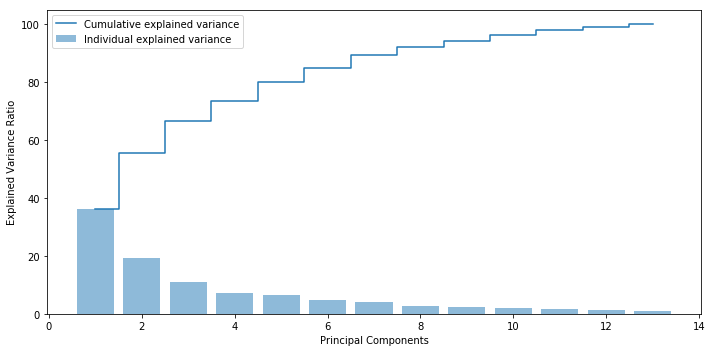

In [24]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)

### Plot the explained variance ratio

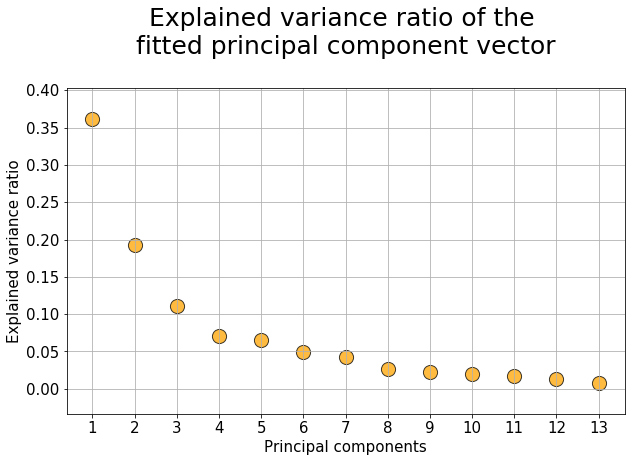

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

### The above plot means that the 1st principal component explains about 36% of the total variance in the data and the 2nd component explains further 20%.

In [27]:
pca = PCA(n_components=3)

dfx_pca = pca.fit(dfx)

### Showing better class separation using principal components
### Transform the scaled data set using the fitted PCA object

In [28]:
dfx_trans = pca.transform(dfx)

### Creating dataframe from transformed one

In [29]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
5,3.050254,-2.122401,-0.629396
6,2.449090,-1.174850,-0.977095
7,2.059437,-1.608963,0.146282
8,2.510874,-0.918071,-1.770969
9,2.753628,-0.789438,-0.984247


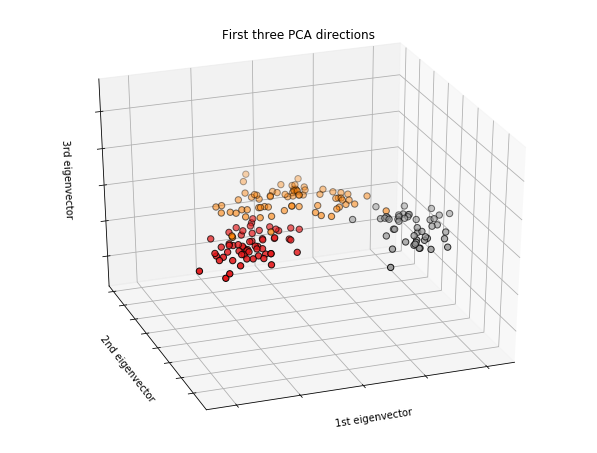

In [30]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(dfx_trans[0],dfx_trans[1], c=df['class'],edgecolors='k',cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

### Feature Transformation using Eigen values

#### Let's now proceed with the three steps to project the standardized Wine dataset onto the new principal component axes. We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

### Construct a projection matrix W from the "top" k eigenvectors.
#### Next, we pick the first three eigenvectors and form the project matrix  W :

In [48]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis]))
print('Peojection matrix W:\n', W)

Peojection matrix W:
 [[-0.1443294   0.48365155  0.20738262]
 [ 0.24518758  0.22493093 -0.08901289]
 [ 0.00205106  0.31606881 -0.6262239 ]
 [ 0.23932041 -0.0105905  -0.61208035]
 [-0.14199204  0.299634   -0.13075693]
 [-0.39466085  0.06503951 -0.14617896]
 [-0.4229343  -0.00335981 -0.1506819 ]
 [ 0.2985331   0.02877949 -0.17036816]
 [-0.31342949  0.03930172 -0.14945431]
 [ 0.0886167   0.52999567  0.13730621]
 [-0.29671456 -0.27923515 -0.08522192]
 [-0.37616741 -0.16449619 -0.16600459]
 [-0.28675223  0.36490283  0.12674592]]


### Finally, we can obtain the compressed dataset by:

### Z ^PCA=ZW
 
### and visualize it using:

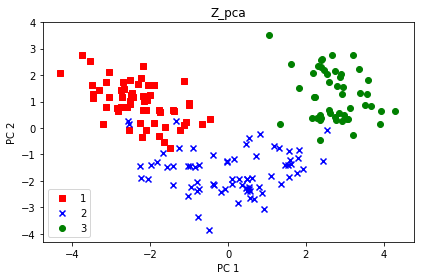

In [49]:
Z_pca = X.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('fig-pca-z.png', dpi=300)
plt.show()

### Transform the d-dimensional input dataset x using the projection matrix W to obtain the new k-dimensional feature subspace

### Taken k = 3

In [50]:
dataset_transformed = pd.DataFrame(Z_pca)
print("Shape of the dataset: ", dataset_transformed.shape)


Shape of the dataset:  (178, 3)


In [51]:
dataset_transformed.head(10)

,0,1,2
0,-3.316751,1.443463,0.165739
1,-2.209465,-0.333393,2.026457
2,-2.516740,1.031151,-0.982819
3,-3.757066,2.756372,0.176192
4,-1.008908,0.869831,-2.026688
5,-3.050254,2.122401,0.629396
6,-2.449090,1.174850,0.977095
7,-2.059437,1.608963,-0.146282
8,-2.510874,0.918071,1.770969
9,-2.753628,0.789438,0.984247


### The two types of transformations done for analysis 

* 1) Using PCA 
* 2) Using Projection matrix 

### No. of dimensions considered for both the analysis is 3.

### Final dataset resulting from both the transformations was same